## Stats701-001 Homework 9: MapReduce, Hadoop and Spark
### Taylor Spooner
#### spoonert@umich.edu

**Collaboration**: 

**Time**:

# 1 Warmup: counting words with `mrjob`

The script to count the words was written outside of jupyter. It is called `spoonert.hw9.1.py` and is attached in the submitted file. For problem 1 we decided to keep apostrophed words together. However, any other sort of punctuation (including hyphenated words) were split into seperate words. The files `simple_word_counts.txt` and `word_counts.txt` contain the results from parts 2 and 3 and are also attached.

**CURRENTLY CONFUSED ABOUT THE NUMBERS!! should we include them or nah?**

**Problem 1:** File atttached as `spoonert.hw9.1.py`.

**Problem 2:** The following command was used to run the script on my local machine:

**Problem 3:** The following commands were used to run the script on the hadoop cluster.

**Problem 4: Using the information in `word_counts.txt`, make a plot of word frequency as a function of word rank on a log-log scale for all words in the file `moby_dick.txt`.**

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

Read in the data from `word_counts.txt`.

In [20]:
dat = pd.read_table("word_counts.txt", header=None)
dat.rename(index=str, columns={0: "word", 1: "freq"}, inplace=True)

In [21]:
dat.head()

,word,freq
0,0,1
1,000,21
2,1,48
3,10,5
4,100,2


In [37]:
dat['rank'] = dat['freq'].rank(ascending=False)

TypeError: cannot convert the series to <class 'float'>

In [32]:
dat.head()

,word,freq,rank
15226,the,14711,1.0
10369,of,6739,2.0
698,and,6516,3.0
201,a,4807,4.0
15457,to,4707,5.0


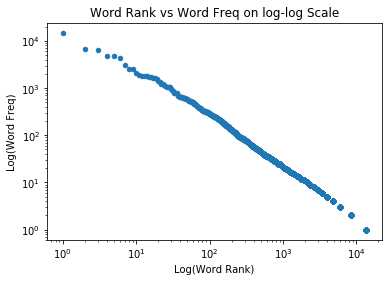

In [44]:
p = dat.plot('rank', 'freq', kind='scatter', loglog=True, title="Word Rank vs Word Freq on log-log Scale")
p.set_xlabel('Log(Word Rank)')
p.set_ylabel('Log(Word Freq)')
plt.show()

Wow! It works! To be honest I was a little skeptical that this would look so linear. This is a negatively sloping linear line. The upper tail looks to deviate from the rest of the line a little but not by much.

# 2. Computing Sample Statistics with `mrjob`

**Problem 1:** For the first problem, we wrote the script outside of jupyter and is attached. For the variance formula we are using $n$ instead of $n-1$.  
**Problem 2:** The output file is also attached. To run the file on my local machine the following command was used:

**Problem 3:** The following code was used to run the shell commands. The output file is included in submission.

**Problem 4:** Plot 95% confidence intervals for the sample means of the populations given by the class labels.